In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [382]:
X, Y = make_classification(n_classes=2,n_samples=500,n_clusters_per_class=1, random_state=6, n_features=2, n_informative=2, n_redundant=0)
Y[Y==0] = -1

In [383]:
X[:5]

array([[-1.12639076, -0.93926452],
       [ 0.67897356,  1.22053778],
       [-0.82025169, -0.92639606],
       [ 0.1781684 ,  1.3735407 ],
       [ 0.65532086,  1.19919068]])

In [384]:
Y[:5]

array([-1,  1, -1,  1,  1])

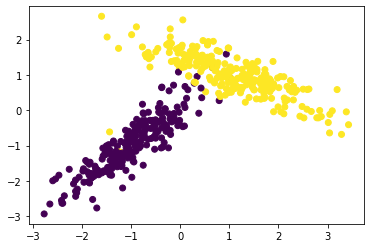

In [385]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [386]:
class SVM:
  def __init__(self,C=1.0):
    self.C = C
    self.W = 0
    self.b = 0
  def cost(self,W,b,X,Y):
    loss = 0.0
    loss += .5*np.dot(W,W.T)
    for i in range(X.shape[0]):
      ti = Y[i] * (np.dot(W,X[i].T)+b)
      loss += self.C * max(0,1-ti)
    return loss[0][0]
  def fit(self,X,Y,batch_size=10,lr=0.001,iters=1000):
    no_features = X.shape[1]
    no_samples = X.shape[0]
    n = lr
    c = self.C
    ids = np.arange(no_samples)
    np.random.shuffle(ids)
    W = np.zeros((1,no_features))
    bias = 0
    losses = []
    for i in range(iters):
      l = self.cost(W,bias,X,Y)/batch_size
      losses.append(l)
      for batch_start in range(0,no_samples,batch_size):
        gradw =  0
        gradb = 0
        for j in range(batch_start,batch_start+batch_size):
          if j < no_samples:
            x = ids[j]
            ti = Y[x] * (np.dot(W,X[x].T)+bias)
            if ti > 1:
              gradw += 0
              gradb += 0
            else:
              gradw += (c*Y[x]*X[x])
              gradb += (c*Y[x])
        W = W - n*W + n*gradw
        bias = bias + n*gradb
    self.W = W
    self.b = bias
    return self.W, self.b, losses

In [387]:
svm = SVM()
W,B,losses = svm.fit(X,Y)

In [388]:
W

array([[0.63370275, 0.92451823]])

In [389]:
B

-0.34700000000000025

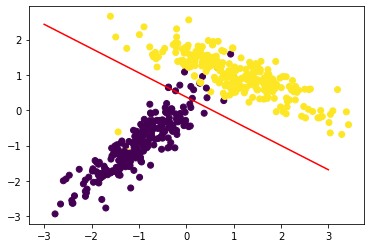

In [390]:
x1 = np.linspace(-3,3,10)
x2 = -(B + W[0][0]*x1)/W[0][1]
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,c='red')

Text(0, 0.5, 'cost')

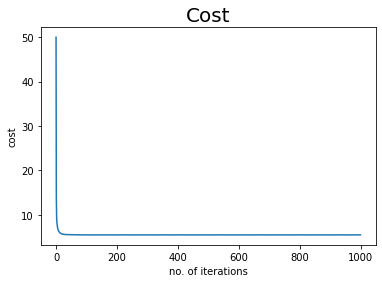

In [391]:
plt.plot(losses)
plt.title("Cost",size=20)
plt.xlabel('no. of iterations',size=10)
plt.ylabel('cost',size=10)

In [392]:
def hypothesis(X, W, b):
  z = b + W[0][0]*X[:,0] + W[0][1]*X[:,1]
  y_pred = sigmoid(z)
  return y_pred
def sigmoid(z):
  return 1.0/1+np.exp(-z)

In [393]:
y_pred = hypothesis(X,W,B)

In [394]:
for i in range(y_pred.shape[0]):
  if y_pred[i] > 2.0:
    y_pred[i] = -1
  else:
    y_pred[i] = 1

In [395]:
for i in range(50):
  print("Pred:\t",y_pred[i],"\tActual:\t",Y[i],"\tMatch:\t",Y[i]==y_pred[i])

Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 -1 	Match:	 False
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 -1.0 	Actual:	 -1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0 	Actual:	 -1 	Match:	 False
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0 	Actual:	 -1 	Match:	 False
Pred:	 1.0 	Actual:	 1 	Match:	 True
Pred:	 1.0

In [396]:
print("Accuracy:", np.mean(Y==y_pred)*100,"%")

Accuracy: 96.39999999999999 %
